# Boxplots with Python / Seaborn

Check out my YouTube explanation <br>
https://youtu.be/IdksHfKJL2A

We are going to create boxplots with Seaborn. <br> 
We'll start off by importing the necessary libraries. <br>
NOTE: You may need to include %matplotlib inline if your charts are not appearing <br>
NOTE: If you are not doing creating your boxplots outside of Jupyter you will have to include plt.show() at the end of your code for each graph. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

I have made some fake data to create our boxplots.

In [2]:
df = pd.read_csv('box_plt_data.csv')

The data includes 5 products and customer satisfaction on each. <br>
Customer satisfaction is made up of multiple questions combined into a single scale. 

In [3]:
df.head()

,p1_satisfaction,p2_satisfaction,p3_satisfaction,p4_satisfaction,p5_satisfaction
0,3.8,3.67,3.26,3.67,4.00
1,4.0,4.36,3.40,4.36,3.00
2,4.4,2.96,2.54,2.96,3.25
3,3.8,3.90,3.31,3.90,3.75
4,4.2,4.04,3.26,4.04,4.25


To create the most basic boxplot we can use sns.boxplot and include the iterable data. In this case it is our dataframe column, but it could be a numpy array or list as well. Usually I'm all about matplotlib because of ALL THE CONTROL (insert evil laugh here). However, with boxplots I usually just go straight to seaborn. I usually don't make my boxplots look too amazing, becasue I find non data inclined folk tend to be intimidated by boxplots. So I rarely create boxplots for offical reports. Boxplots can be great for those who have experience interpreting boxplots. 

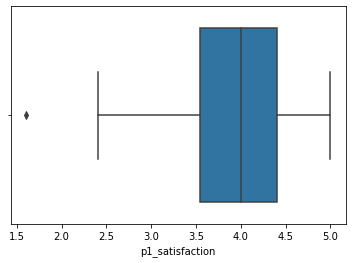

In [4]:
sns.boxplot(df['p1_satisfaction'])
# in jupyter notebooks plt.show() is optional
# plt.show() 

We can change the orientation of the box plot by including the argument <br> <code>orient='v'<code>

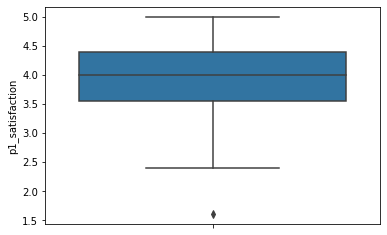

In [5]:
sns.boxplot(df['p1_satisfaction'], orient='v')

There we go, and ugly boxplot with Seaborn. <br>
Don't worry, we can make our box plot look really nice without too much effort. <br>
we are going to use matplotlib a little here to help us out. 

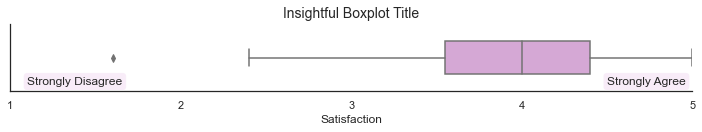

In [6]:
# set style - I like the clean look of white
sns.set(style='white')

# set figure size (check in word doc - jupyter can be misleading with size)
fig, ax = plt.subplots(figsize=(10,2))

# Create box plot
# if you like notched boxplots you can add one with the argument notch=True
# sns.boxplot(df['p1_satisfaction'], color="plum", width=.5, notch=True) 

# I don't like notched boxplots so I'm not going to add it
sns.boxplot(df['p1_satisfaction'], color="plum", width=.5) 

# Title and x-label
plt.title('Insightful Boxplot Title', fontsize=14)
plt.xlabel('Satisfaction')

# remove top and right borders
sns.despine()

# Show full range of possible values on x-axis (otherwise it is truncated at 1.5)
# ax.set(xlim=(1,5)) # this is an alternative way 
plt.xlim([1,5])
plt.xticks(np.arange(1,6,1))

# Strongly Disagree & Strongly Agree Text
props = dict(boxstyle='round', facecolor='plum', alpha=0.2) # Set the box color/style aroung SD & SA
ax.text(1.1, 0.4, "Strongly Disagree", fontsize=12, bbox=props)
ax.text(4.5, 0.4, "Strongly Agree", fontsize=12, bbox=props)

# tight_layout() will help us fit everything in the figure
plt.tight_layout()
# optional save figure
# plt.savefig('sat_box_p1.png', transparent=True, dpi=300)
plt.show()

We can add multiple boxplots to one figure for easy comparison. 

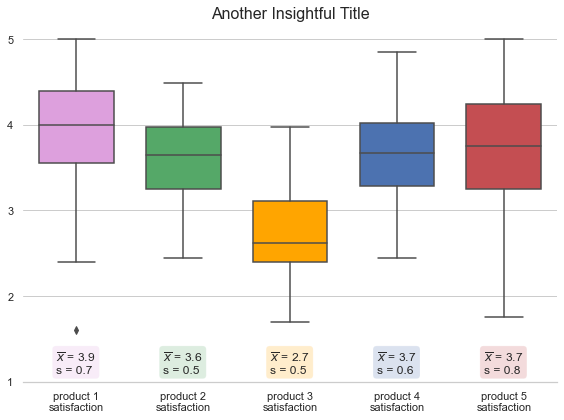

In [9]:
# set style - When adding multple boxplots I like use whitegird 
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))

g = sns.boxplot(data=df, width=0.7)#notch=True, ) # df[['p1_satisfaction','p2_satisfaction','p3_satisfaction']]

# Titles and labels
plt.title("Another Insightful Title", fontsize=16)
# xlabel is probably not necessary with the product names included for each product
# plt.xlabel("product", fontsize=14)
# with a descriptive title a ylabel might not be necessary
# plt.ylabel("Score (1-5)", fontsize=14)

# X tick-labels
# we are including this because I want the full product name not the variable name
xvalues = ["product 1\nsatisfaction","product 2\nsatisfaction","product 3\nsatisfaction",
           "product 4\nsatisfaction","product 5\nsatisfaction"] 

# set xvalues as xtick values
plt.xticks(np.arange(5), xvalues)

# set y-axis values (I only want whole numbers)
plt.yticks(plt.yticks(np.arange(1,6))  )

# remove all borders except bottom
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

# Set colors of box plots 
# https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
palette= ['plum','g','orange','b','r']
color_dict = dict(zip(xvalues, palette))
for i in range(0,5):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

### Provide mean and standard deviation for each product ###   
# Text p1
mean = round(df['p1_satisfaction'].mean(),1)
sd = round(df['p1_satisfaction'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='plum', alpha=0.2)
g.text(-0.19, 1.1, textstr, fontsize=12, bbox=props)

# Text p2
mean = round(df['p2_satisfaction'].mean(),1)
sd = round(df['p2_satisfaction'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='g', alpha=0.2)
g.text(.81, 1.1, textstr, fontsize=12, bbox=props)

# Text p3
mean = round(df['p3_satisfaction'].mean(),1)
sd = round(df['p3_satisfaction'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='orange', alpha=0.2)
g.text(1.81, 1.1, textstr, fontsize=12, bbox=props)

# Text p4
mean = round(df['p4_satisfaction'].mean(),1)
sd = round(df['p4_satisfaction'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='b', alpha=0.2)
g.text(2.81, 1.1, textstr, fontsize=12, bbox=props) # 2 for y but covers diamond

# Text p5
mean = round(df['p5_satisfaction'].mean(),1)
sd = round(df['p5_satisfaction'].std(),1)
textstr = "$\overline {x}$" + f" = {mean} \ns = {sd}"
props = dict(boxstyle='round', facecolor='r', alpha=0.2)
g.text(3.81, 1.1, textstr, fontsize=12, bbox=props)

    
plt.tight_layout()
# plt.savefig('all_sat_boxplots.png', dpi=500)
plt.show()

Hey! This looks pretty good. One problem is that all this color is distracting. <br> 
Further, if these products actually had names (other than product 1, product 2, etc.) the order of the boxplots doesn't help us interpret the data. Also, including the mean is confusing because the boxplot marks the median. <br>
If we want to help focus the viewers attention and help their interpretation we can make some changes to color and ordering of the boxplots. 

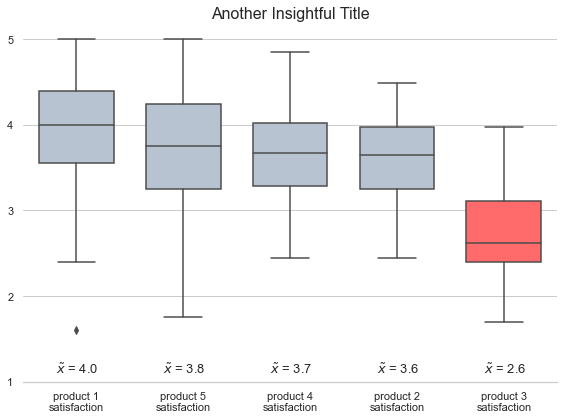

In [11]:
# reordering columns in decending value of the median
df_ordered = df[['p1_satisfaction','p5_satisfaction','p4_satisfaction','p2_satisfaction','p3_satisfaction']]

# set style I like the clean look of white
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))

g = sns.boxplot(data=df_ordered, width=0.7)

plt.title("Another Insightful Title", fontsize=16)

### CHANGE ORDER to match dataframe ###
# X labels
xvalues = ["product 1\nsatisfaction","product 5\nsatisfaction","product 4\nsatisfaction",
           "product 2\nsatisfaction","product 3\nsatisfaction"] 

# x-labels
plt.xticks(np.arange(5), xvalues)

# setting y values
plt.yticks(plt.yticks(np.arange(1,6)))

# remove borders
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

### CHANGE ORDER #### ### CHANGE X coordinates ###, change median, change textstr

# https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/
# Set colors of box plots 
palette= ['#B7C3D0','#B7C3D0','#B7C3D0','#B7C3D0','#FF6A6A']
color_dict = dict(zip(xvalues, palette))
for i in range(0,5):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])
    
# Text p1
median = round(df['p1_satisfaction'].median(),1)
# sd = round(df['p1_satisfaction'].std(),1) ## DELETE
textstr = r"$\tilde {x}$" + f" = {median}"
# props = dict(boxstyle='round', facecolor='#B7C3D0', alpha=0.2) #### delete
g.text(-0.19, 1.1, textstr, fontsize=13,) #### delete bbox

# Text p5
median = round(df['p5_satisfaction'].median(),1)
# sd = round(df['p5_satisfaction'].std(),1)
textstr = r"$\tilde {x}$" + f" = {median}"
# props = dict(boxstyle='round', facecolor='#B7C3D0', alpha=0.2)
g.text(.81, 1.1, textstr, fontsize=13,)

# Text p4
median = round(df['p4_satisfaction'].median(),1)
# sd = round(df['p4_satisfaction'].std(),1)
# textstr = f"7 items\n \u03B1=.81"
textstr = r"$\tilde {x}$" + f" = {median}"
# props = dict(boxstyle='round', facecolor='#B7C3D0', alpha=0.2)
g.text(1.81, 1.1, textstr, fontsize=13,) 

# Text p2
median = round(df['p2_satisfaction'].median(),1)
# sd = round(df['p2_satisfaction'].std(),1)
textstr = r"$\tilde {x}$" + f" = {median}"
# props = dict(boxstyle='round', facecolor='#B7C3D0', alpha=0.2)
g.text(2.81, 1.1, textstr, fontsize=13)

# Text p3
median = round(df['p3_satisfaction'].median(),1)
# sd = round(df['p3_satisfaction'].std(),1)
textstr = r"$\tilde {x}$" + f" = {median}"
# props = dict(boxstyle='round', facecolor='#FF6A6A', alpha=0.2)
g.text(3.81, 1.1, textstr, fontsize=13,)
   
    
plt.tight_layout()
# plt.savefig('all_sat_boxplots.png', dpi=500)
plt.show()

Now our boxplots clearly show us that product 3 has low satisfaction (even if it is a little less pretty). <br> 
Including the median instead of the mean fits with our plot better! <br>
Depening on your audiance it may be beter to use "Med" or "Median" to represent the median